In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
def get_percent_of_na(df,num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print('There are {} columns with NA!'.format(count))
    else:
        print()
        print('There are no columns with NA!')


def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        

def get_info(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*120)
    print('Info:')
    print()
    display(df.info())
    print ('-'*120)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*120)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*120)
    print('Shape:')
    print(df.shape)
    print ('-'*120)
    print('Duplicated:')
    print('We have {} duplicated rows!'.format(df.duplicated().sum()))

In [4]:
geo0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
geo1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
geo2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

### Geo 0

In [5]:
get_info(geo0)

Head:



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


------------------------------------------------------------------------------------------------------------------------


,id
count,100000
unique,99990
top,HZww2
freq,2



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


------------------------------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


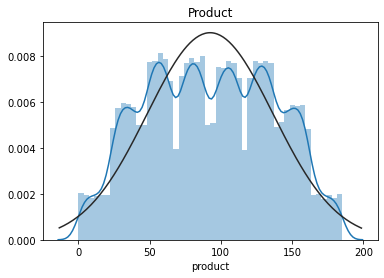

In [6]:
sns.distplot(geo0['product'], fit=norm);
plt.title('Product');

**Summary:**

We do not have a single missing value.<br>
All of the data types are correct.<br>
Since I do not know the meaning of f0, f1, f2 I assume that the values are correct.<br>
No duplicates. <br>
We have 5 oil wells with two holes since the number of records is 100k and given that we have 99990 unique and since no duplicates rows here.<br>
I did not been told that its not ok to have multiple checks per well so can assume its ok.

From the graph we can see that for geo0 the product looks normal

Conclusion:

Will drop the id column since its just the id of the well, not much info for regression.

### Geo 1

In [7]:
get_info(geo1)

Head:



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


------------------------------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,LHZR0
freq,2



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


------------------------------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


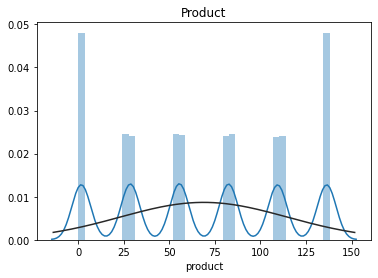

In [8]:
sns.distplot(geo1['product'], fit=norm);
plt.title('Product');

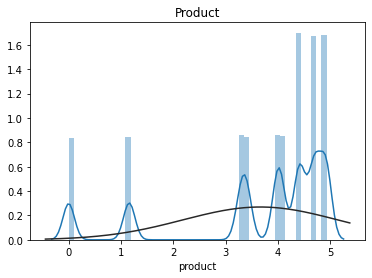

In [9]:
sns.distplot(geo1['product'].apply(lambda x: np.log(x) if x!=0 else 0), fit=norm);
plt.title('Product');

**Summary:**

All the same but the graph looks suspicious, if we are to use linear regression we 
need the target variable to distribute normally which is not the case.

### Geo 2

In [10]:
get_info(geo2)

Head:



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


------------------------------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,xCHr8
freq,2



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


------------------------------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


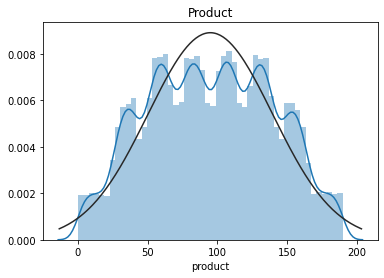

In [11]:
sns.distplot(geo2['product'], fit=norm);
plt.title('Product');

**Summary:**

Same

# Model

In [12]:
from numpy.random import RandomState
state = RandomState(12345)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Number of wells that need to pick: **200**

Revenue from one product: **4500 USD**

Budget = **100m**

In [13]:
budget = 100 * 10**6
pick = 200
rev = 4500

goal = (budget / pick ) / rev
goal

111.11111111111111

**Conclusion:** <br>
We need at least 111 barrels to get even

In [14]:
def profit(target, predictions, count, revenue_unit, cost_unit):

    predictions_sorted = pd.Series(predictions).reset_index(drop=True).sort_values(ascending=False)
    
    # take indices from predictions_sorted and use it with for target
    selected_values = target.reset_index(drop=True).iloc[predictions_sorted.index][:count]
    
    # calculate total product volume
    product_vol = selected_values.sum()
    revenue = product_vol * revenue_unit
    cost = cost_unit * count
    
    return (revenue - cost)

In [15]:
datasets = [geo0, geo1, geo2]
def get_features_targets(datasets):
    targets_train = []
    targets_valid = []
    features_train = []
    features_valid = []
    for data in datasets:
        data = data.copy()
        data = data.drop(columns='id')
        X = data[data.columns.difference(['product'])]
        y = data['product']
        X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                              test_size = 0.25, random_state=state)
        features_train.append(X_train)
        features_valid.append(X_valid)
        
        targets_train.append(y_train)
        targets_valid.append(y_valid)
    return features_train, features_valid, targets_train, targets_valid

In [16]:
feature_train, features_valid, targets_train, targets_valid = get_features_targets(datasets)

In [17]:
from collections import defaultdict
d = defaultdict(list)
preds = []
for i in range(len(datasets)):
    model = LinearRegression()
    model.fit(feature_train[i], targets_train[i])
    pred = model.predict(features_valid[i])
    preds.append(pred)
    d['region'].append(i)
    d['valid_rmse'].append(mean_squared_error(targets_valid[i], pred) ** 0.5)
    d['avg_pred'].append(pred.mean())
    d['avg_target'].append(targets_train[i].mean())
display(pd.DataFrame(d)) 

,region,valid_rmse,avg_pred,avg_target
0,0,37.579422,92.592568,92.640468
1,1,0.889737,68.769951,68.842792
2,2,39.958042,95.087528,95.083680


# **Conclusion**

I can tell that for region two we have the highest average of prediction but even this region is not close enough to our goal, 111.<br>
Having said that we can see that the RMSE of region 2 is the highest but the smallest RMSE gives us the lowest average on product prediction. Which we saw from graph before might not tell us the truth.

This means that we definitely have unprofitable wells in each region. Hence we choose 200 wells with best predictions.I will use bootstrap method to investigate it deeper.

In [18]:
for region in range(len(datasets)):
    print(profit(targets_valid[region], preds[region], pick, rev, 500000))

33208260.431398526
24150866.966815114
25399159.45842947


Our best profit is from region 0, will check this with our bootstap method.

In [19]:
def bootstrap_profit(target_bootstrap, predicted_bootstrap):
    # create a RandomState() instance from the numpy.random module
    state = np.random.RandomState(12345)
    
    # create a list of metrics values
    values = []
    params = pd.DataFrame()
    
    for i in range(1000):
        # make 500 samples
        target_subsample = target_bootstrap.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    
        # take indices from target_subsample and use it with for predicted_valid_subsample
        predicted_valid_subsample = pd.Series(predicted_bootstrap).iloc[target_subsample.index]
        
        # append values from profit function to list "values"
        values.append(profit(target_subsample, predicted_valid_subsample, 200, 4500, 500000))

    # convert values to Series
    values = pd.Series(values)
    
    # calculate mean, confidence interval limits and risk of losses for "values" 
    average_profit = values.mean()
    lower_limit = values.quantile(0.025)
    upper_limit = values.quantile(0.975)
    risk_of_losses = (((values < 0).sum() / len(values)) * 100)
    
    print(f'average profit: {average_profit}')
    print(f'confidence interval: {lower_limit} : {upper_limit}' )
    print(f'risk of losses: {risk_of_losses}')

In [20]:
for region in range(len(datasets)):
    print(f'Region number {region}')
    bootstrap_profit(targets_valid[region], preds[region])
    print()

Region number 0
average profit: 3961649.848023711
confidence interval: -1112155.4589049604 : 9097669.415534232
risk of losses: 6.9

Region number 1
average profit: 4456175.525584454
confidence interval: 545859.2369601562 : 8330681.504269468
risk of losses: 1.0999999999999999

Region number 2
average profit: 3400269.0417306605
confidence interval: -2080297.7978817932 : 8688559.258374646
risk of losses: 10.7



# Conclusion:

As we see we have negative gross profit for confidence interval and percent of losses is 7.1 region 0, hence region 0 isn't good for us.<br>
We got the best average profit in region 1. This region has highest average profit = 5.37 million dollars. And the lowest risk of losses = 0.9
But we should keep in mind that distribution of target was bad.

# Conclusion:

Since both region 0 and 2 have negative confidence intervals we should not pick them. Even though region 1 distributes non normal for target variable we should use our 200 holes there.